In [1]:
from config import CONFIG
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
%matplotlib notebook
import math
import numpy as np
import pandas as pd
import sys
import time

In [2]:
path = CONFIG['PATH']
pairs = CONFIG['PAIRS']
start_date='2017-01-01'
end_date='2017-12-31'
dates=pd.date_range(start_date, end_date)
merged_candlesticks=pd.DataFrame(index=dates)

for pair in pairs:
    candlesticks = pd.read_csv(path + "/data/"+ pair.replace('/','-') +"/candlesticks.csv", parse_dates=True, usecols=['date','close'], na_values=['nan'])
    candlesticks['date'] = pd.Series([dt.datetime.fromtimestamp(int(ts)).strftime('%Y-%m-%d')
                                     for ts in candlesticks['date']]).values
    candlesticks = candlesticks.set_index('date')
    candlesticks = candlesticks.rename(columns={'close':pair})
    merged_candlesticks=merged_candlesticks.join(candlesticks)
    merged_candlesticks.dropna()
#print(merged_candlesticks.head(5)) 

In [3]:
def plot_data(df, title="Prices"):
    ax = df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

def normalize_data(df):
    return df / df.iloc[0,:]

def compute_daily_returns(df):
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    daily_returns.iloc[0,:] = 0
    return daily_returns

def scatter_plot(df, base_pair):
    for pair in pairs:
        if pair != base_pair:
            df.plot(kind='scatter', x=base_pair, y=pair)
            beta, alpha = np.polyfit(daily_returns[base_pair], daily_returns[pair],1)
            plt.title("Beta and Alpha for " + pair + " in relation to " + base_pair)
            plt.plot(df[base_pair], beta * df[base_pair] + alpha, '-', color='r')
            print('alpha',alpha)
            print('beta',beta)

In [4]:
#print(merged_candlesticks.loc['2017-01-01':'2017-12-31', ['BTS/BTC','STEEM/BTC']].head(5))

<IPython.core.display.Javascript object>


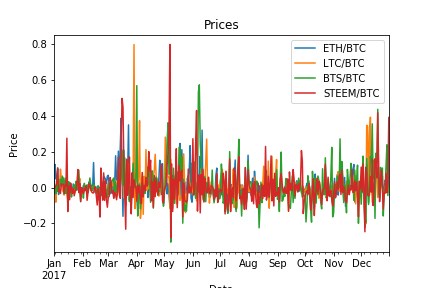

In [5]:
daily_returns=compute_daily_returns(merged_candlesticks)
plot_data(daily_returns)

<IPython.core.display.Javascript object>


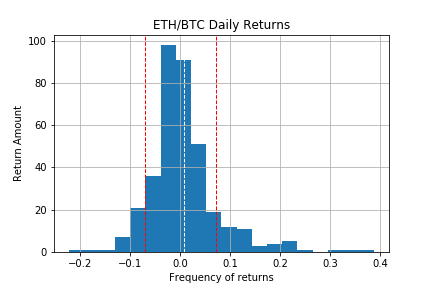

<IPython.core.display.Javascript object>


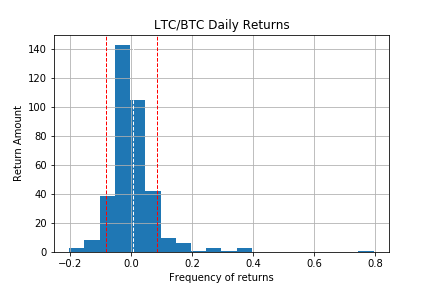

<IPython.core.display.Javascript object>


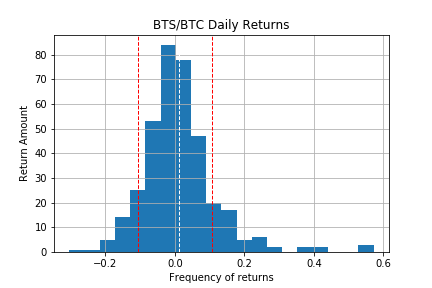

<IPython.core.display.Javascript object>


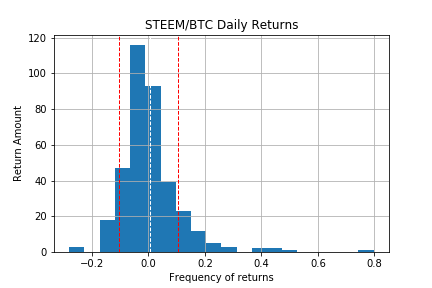

In [6]:
for pair in pairs:
    fig, ax = plt.subplots()
    daily_returns[pair].hist(bins=20, label=pair)
    mean = daily_returns[pair].mean()
    std = daily_returns[pair].std()
    ax.set_xlabel("Frequency of returns")
    ax.set_ylabel("Return Amount")
    ax.set_title(pair + " Daily Returns")
    plt.axvline(mean,color='w',linestyle='dashed', linewidth=1)
    plt.axvline(std,color='r',linestyle='dashed', linewidth=1)
    plt.axvline(-std,color='r',linestyle='dashed', linewidth=1)
plt.show()    

<IPython.core.display.Javascript object>


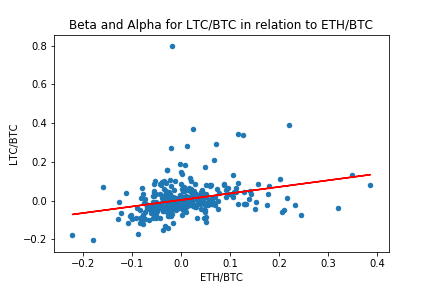

alpha 0.00402466306372
beta 0.337390488899


<IPython.core.display.Javascript object>


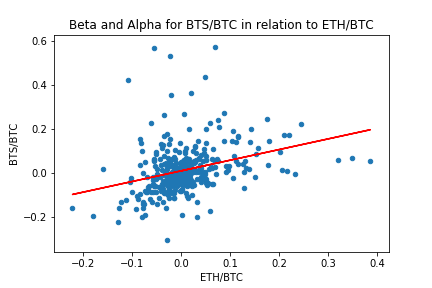

alpha 0.00882635054051
beta 0.482815394266


<IPython.core.display.Javascript object>


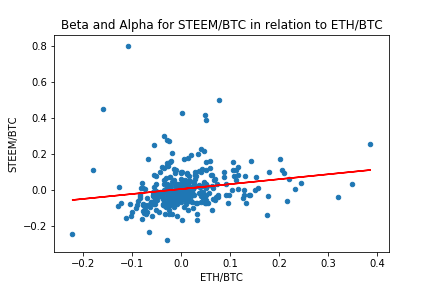

alpha 0.00463507253275
beta 0.27333306686


In [7]:
scatter_plot(daily_returns, 'ETH/BTC')

In [8]:
print(daily_returns.corr(method='pearson'))

            ETH/BTC   LTC/BTC   BTS/BTC  STEEM/BTC
ETH/BTC    1.000000  0.286176  0.319175   0.185234
LTC/BTC    0.286176  1.000000  0.190525   0.124932
BTS/BTC    0.319175  0.190525  1.000000   0.466216
STEEM/BTC  0.185234  0.124932  0.466216   1.000000


<IPython.core.display.Javascript object>


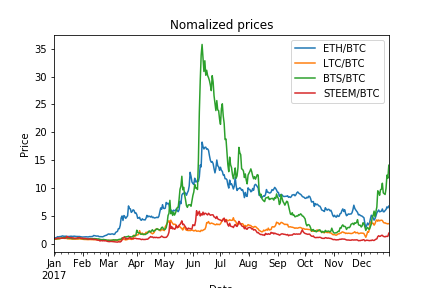

In [9]:
normalized=normalize_data(merged_candlesticks)
plot_data(normalized, "Nomalized prices")

In [10]:
# window = 20
# no_of_std = 2

# rm_btc = pd.Series(candlesticks['close']).rolling(window=window).mean()
# rstd_btc = pd.Series(candlesticks['close']).rolling(window=window).std()
# candlesticks['Rolling Mean'] = rm_btc
# candlesticks['Rolling Mean'].fillna(method='bfill', inplace=True)


# candlesticks['Bollinger High'] = rm_btc + (rstd_btc * no_of_std)
# candlesticks['Bollinger High'].fillna(method='bfill', inplace=True)

# candlesticks['Bollinger Low'] = rm_btc - (rstd_btc * no_of_std)
# candlesticks['Bollinger Low'].fillna(method='bfill', inplace=True)

# x = candlesticks['date']
# ax = candlesticks[['close','Rolling Mean', 'Bollinger High', 'Bollinger Low']].plot(x, title="BTC/ETC Bollinger Bands", label="BTC/ETC")

# ax.set_xlabel("Date")
# ax.set_ylabel("Price")
# ax.legend(loc='upper left')